In [64]:
import json
import csv
import tweepy
import re
consumer_key = 'TI6eKMiw2zrCYgJSEBx65J5Wd'
consumer_secret = 'QaPthwlnw96U0yxw7rW6iMX0Uw0R6qIamgPZWmIKLn8KCo7o9B'
access_token = '957493071477747714-WrYCL8BXZRTDKw6PrDrpfSVDpjjaMzG'
access_token_secret = 'eV2SLOgs94YL7cqj2lf3iCNI4Kn0EvsjjAsDw8wuLPgXj'
def search_for_hashtags(hashtag_phrase):
    
    #create authentication for accessing Twitter
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    #initialize Tweepy API
    api = tweepy.API(auth)
    
    #get the name of the spreadsheet we will write to
    fname = '_'.join(re.findall(r"#(\w+)", hashtag_phrase))
    
    #open the spreadsheet we will write to
    with open('hastag%s.csv' %(fname), 'w+', encoding='utf-8') as file:

        w = csv.writer(file)

       # write header row to spreadsheet
        w.writerow(['timestamp', 'tweet_text', 'username', 'all_hashtags', 'followers_count','likes_count'])

        #for each tweet matching our hashtags, write relevant info to the spreadsheet
        for tweet in tweepy.Cursor(api.search, q=hashtag_phrase+' -filter:retweets',lang="en", tweet_mode='extended',since="2019-12-03").items(150):
            w.writerow([tweet.created_at, tweet.full_text.replace('\n',' ').encode('utf-8'), tweet.user.screen_name.encode('utf-8'), [e['text'] for e in tweet._json['entities']['hashtags']], tweet.user.followers_count,tweet.favorite_count])

In [85]:

hashtag_phrase = input('Hashtag Phrase ')
new_hash = hashtag_phrase.split()

t=['#'+i for i in new_hash]
new_hash = " ".join(t)
c=int(input('enter 1 for or 2 for and'))
fname = '_'.join(re.findall(r"#(\w+)", new_hash))
if(c==1):
    new_hash=new_hash.replace(' ',' OR ')
elif(c==2):
    new_hash=new_hash.replace(' ',' AND ')
else:
    print("incorrect input")
search_for_hashtags(new_hash)


new='hastag'+fname


Hashtag Phrase water covid ice
enter 1 for or 2 for and2


In [86]:
import pandas as pd
dataset = pd.read_csv('{}.csv'.format(new))
dataset=dataset.dropna()
if dataset.empty:
    print('DataFrame is empty!')
    
#print(dataset.describe())
import os
os.remove('{}.csv'.format(new))
for col in dataset.columns: 
    print(col) 
print(dataset['tweet_text'])

DataFrame is empty!
timestamp
tweet_text
username
all_hashtags
followers_count
likes_count
Series([], Name: tweet_text, dtype: object)


In [68]:
for col in dataset['tweet_text']: 
    tweet_var=col
    print(tweet_var)

b'@Priyans86541450 https://t.co/8bN1rTsn2F Have a quick read please!! #maggi #Maggie'
b'Simpsons Shelf Number 29, more soft toys and plush dolls #simpsonsdolls #dolls #plush #softtoys #vintagebart #woodentoys #maggie #wrestling #mexicanwrestling #bumbleman  #simpsonsplush #simpsonsshelf #newsimpsons\xe2\x80\xa6 https://t.co/sA3Tveo6Kg'
b'@maggieNYT is still handbag deep in her #butheremails work. #maggie nor @nytimes can be trusted to work for America.  #trumpists #TrumpIsKillingUs https://t.co/xEwiS1mC0G'
b'#Maggie New Style Maggie Recipe || Fried Butter Maggie with Corn  https://t.co/sUmiN7FQJI'
b"I love you. Yet, you've NO f**king sense What Mayhem &amp; Horror She Demands of me. And of course, I am in Love... Love Sux!!! #Maggie #GothyKitty #Whatever !!! Hi @Deathvalleygrls  Mags luvs U!! #DoubleWhatever @suicidesqueeze https://t.co/20ParhHVp0"
b'Maggie being cool. #digitalart #digital #digitaldrawing #amphibia #ArtistOnTwitter #color #illustration #cartoon #toon #cartoony #darkzir

In [69]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
df=pd.DataFrame(dataset.tweet_text)
pattern = re.compile(r'[\\]+[\w\w\w]+')
t=[]
for i in df['tweet_text']:
    i = re.sub(pattern,'',i)
    t.append(i[2:-2])
df4 = pd.DataFrame(t)
df4.columns =["tweet_text"]
df4

,tweet_text
0,@Priyans86541450 https://t.co/8bN1rTsn2F Have ...
1,"Simpsons Shelf Number 29, more soft toys and p..."
2,@maggieNYT is still handbag deep in her #buthe...
3,#Maggie New Style Maggie Recipe || Fried Butte...
4,"I love you. Yet, you've NO f**king sense What ..."
...,...
132,The whole set! $50 Free Shipping PR and US #...
133,#Sean @#FoxNews #OldBkMan. I was just on the #...
134,My life is a lie #maggie #masterchefau #mast...
135,When travelling in mountains you all know havi...


In [70]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stoplist = stopwords.words('english')
print(stoplist)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
ps = nltk.PorterStemmer()
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stoplist]  # remove stopwords and stemming
    return text

In [72]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df4['tweet_text'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

137 Number of tweets has 1275 words


In [73]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()


In [74]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(lst):
    # remove twitter Return handles (RT @xxx:)
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
    # remove twitter handles (@xxx)
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
    # remove URL links (httpxxx)
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
    # remove special characters, numbers, punctuations (except for #)
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")
    lst = np.core.defchararray.replace(lst, "b'", " ")
    return lst
df4['Tweet_final'] =clean_tweets( df4['tweet_text'])
df4.head(10)

,tweet_text,Tweet_final
0,@Priyans86541450 https://t.co/8bN1rTsn2F Have ...,Have a quick read please!! #maggi #Maggi
1,"Simpsons Shelf Number 29, more soft toys and p...","Simpsons Shelf Number 29, more soft toys and p..."
2,@maggieNYT is still handbag deep in her #buthe...,is still handbag deep in her #butheremails wo...
3,#Maggie New Style Maggie Recipe || Fried Butte...,#Maggie New Style Maggie Recipe || Fried Butte...
4,"I love you. Yet, you've NO f**king sense What ...","I love you. Yet, you've NO f**king sense What ..."
5,Maggie being cool. #digitalart #digital #digit...,Maggie being cool. #digitalart #digital #digit...
6,@MiriamStoppard giving Maggie fashion advice ....,giving Maggie fashion advice .. Loving this d...
7,Peek-a-boo #Amphibia #Marcy #Sasha #Maggie ht...,Peek-a-boo #Amphibia #Marcy #Sasha #Maggie
8,I Think I Should Stop Buying #Maggie Would...,I Think I Should Stop Buying #Maggie Would...
9,That Look Yu Give Yur Dad When He Asks For ...,That Look Yu Give Yur Dad When He Asks For ...


In [75]:
sents=[]  
df1=pd.DataFrame(df4.Tweet_final)

for col in df1['Tweet_final']:
    var=col
    val = analyser.polarity_scores(var)
    sents.append(val['compound'])
print(sents)
df1['sentiment']=sents
df1

[0.4374, 0.0772, -0.3724, 0.0, 0.7674, 0.3182, 0.875, 0.0, -0.296, 0.0, 0.6391, 0.0, 0.5994, 0.0, 0.5574, 0.4003, 0.0, 0.9011, -0.2263, -0.1263, -0.2732, 0.4404, -0.3612, 0.0, 0.743, -0.5027, 0.0, 0.0, -0.2732, 0.0, 0.6908, -0.7845, 0.1695, 0.0, 0.636, 0.5106, 0.1134, -0.89, 0.1027, -0.34, -0.4767, -0.34, 0.0, -0.6615, -0.84, 0.4215, -0.5859, 0.3612, 0.0, 0.6124, -0.4926, -0.5894, 0.0, 0.0, -0.0516, 0.3818, 0.296, 0.3578, -0.296, 0.0, 0.0, -0.5215, -0.5994, 0.0, -0.7351, 0.0, -0.8992, 0.7845, 0.8074, 0.3753, -0.6929, 0.8402, 0.7269, 0.6369, -0.5267, -0.7845, 0.4767, 0.5719, 0.7093, -0.3612, -0.2023, -0.4728, 0.0, -0.6908, 0.0, -0.2942, 0.4199, 0.636, 0.7906, 0.6249, 0.765, 0.0, 0.5267, 0.0, -0.6115, 0.1531, -0.2732, 0.0, 0.5608, 0.5935, 0.0, 0.8176, 0.0, 0.7783, 0.0, 0.8313, 0.0, 0.4767, 0.0, 0.4215, 0.2168, 0.0, 0.4754, 0.4404, 0.3806, 0.0, -0.296, 0.0772, 0.6369, 0.6369, -0.3182, 0.0, 0.0, 0.3919, -0.9022, 0.0, 0.6249, 0.0, 0.0, -0.5859, 0.6249, 0.7712, 0.5562, -0.296, 0.4404, 0.5562

,Tweet_final,sentiment
0,Have a quick read please!! #maggi #Maggi,0.4374
1,"Simpsons Shelf Number 29, more soft toys and p...",0.0772
2,is still handbag deep in her #butheremails wo...,-0.3724
3,#Maggie New Style Maggie Recipe || Fried Butte...,0.0000
4,"I love you. Yet, you've NO f**king sense What ...",0.7674
...,...,...
132,The whole set! $50 Free Shipping PR and US #...,0.5562
133,#Sean #FoxNews #OldBkMan. I was just on the #N...,-0.2960
134,My life is a lie #maggie #masterchefau #mast...,0.4404
135,When travelling in mountains you all know havi...,0.5562


[Text(0, 0.5, '#Tweets'),
 Text(0.5, 0, 'Negative                  Neutral                    Positive'),
 Text(0.5, 1.0, 'Tweets of @Tweets Sentiment')]

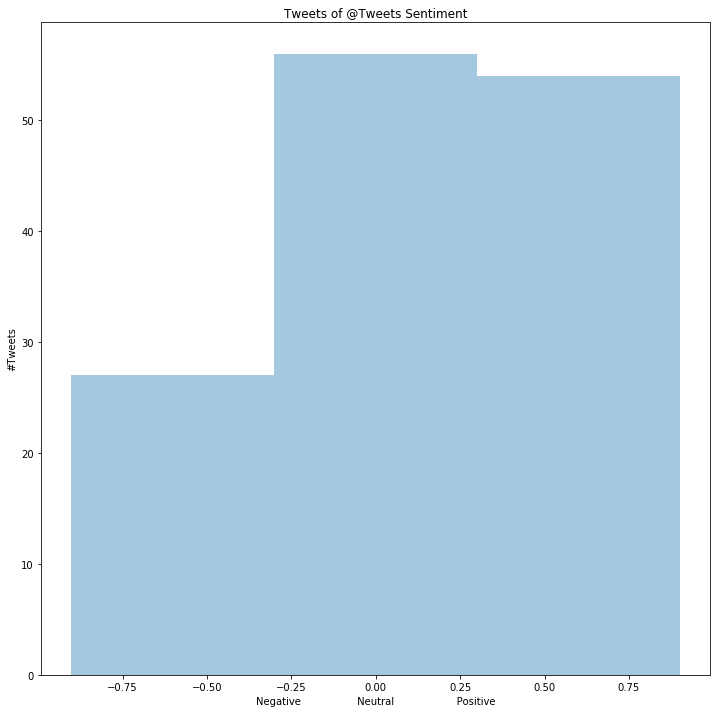

In [76]:
title='Tweets Sentiment'

ax = sns.distplot(
        sents,
        kde=False,
        bins=3
        )
ax.set(xlabel='Negative                  Neutral                    Positive',ylabel='#Tweets',title="Tweets of @"+title)

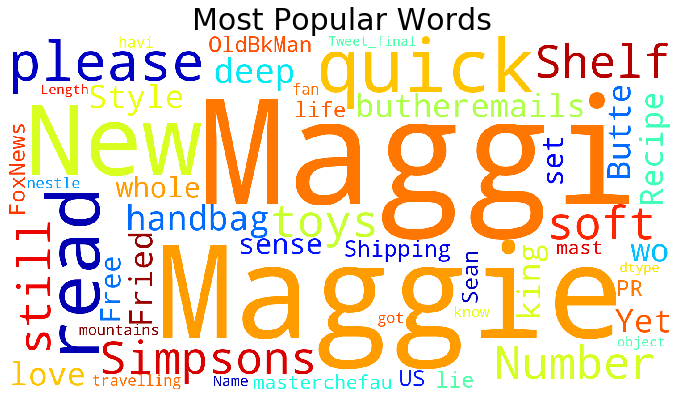

In [77]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, colormap='jet',max_words=150, width = 1500, height = 800).generate(str(wd_list))

    plt.rcParams['figure.figsize'] = (12, 12)
    plt.title('Most Popular Words', fontsize = 30)
    print(wordcloud)
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
word_cloud(df1['Tweet_final'])

In [78]:
def sentiment_analyzer_scores(text):
    score = analyser.polarity_scores(text)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1
df4['score'] = df4['Tweet_final'].apply(lambda x: sentiment_analyzer_scores(x))
df4

,tweet_text,Tweet_final,score
0,@Priyans86541450 https://t.co/8bN1rTsn2F Have ...,Have a quick read please!! #maggi #Maggi,1
1,"Simpsons Shelf Number 29, more soft toys and p...","Simpsons Shelf Number 29, more soft toys and p...",1
2,@maggieNYT is still handbag deep in her #buthe...,is still handbag deep in her #butheremails wo...,-1
3,#Maggie New Style Maggie Recipe || Fried Butte...,#Maggie New Style Maggie Recipe || Fried Butte...,0
4,"I love you. Yet, you've NO f**king sense What ...","I love you. Yet, you've NO f**king sense What ...",1
...,...,...,...
132,The whole set! $50 Free Shipping PR and US #...,The whole set! $50 Free Shipping PR and US #...,1
133,#Sean @#FoxNews #OldBkMan. I was just on the #...,#Sean #FoxNews #OldBkMan. I was just on the #N...,-1
134,My life is a lie #maggie #masterchefau #mast...,My life is a lie #maggie #masterchefau #mast...,1
135,When travelling in mountains you all know havi...,When travelling in mountains you all know havi...,1


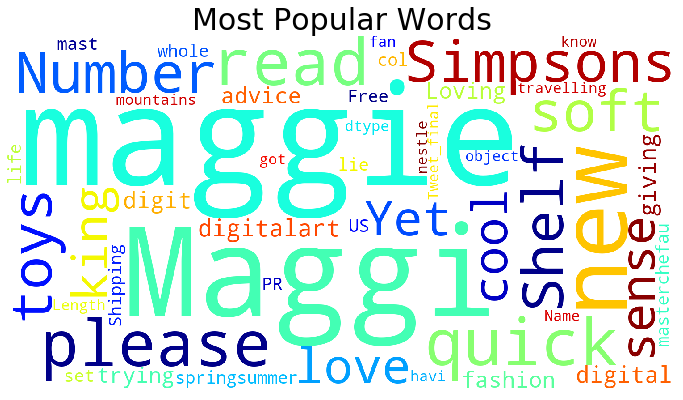

In [79]:
tws_pos=df4['Tweet_final'][df4['score']==1]
word_cloud(tws_pos)

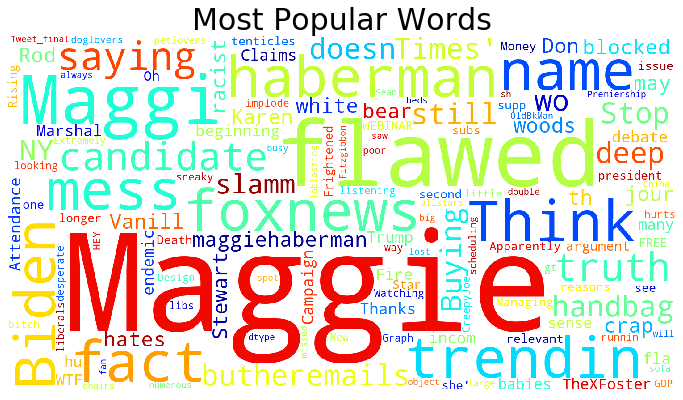

In [84]:
tws_neg=df4['Tweet_final'][df4['score']==-1]
word_cloud(tws_neg)

In [81]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweets
HT_positive = hashtag_extract(df4['Tweet_final'][df4['score'] == 1])
# extracting hashtags from negative tweets
HT_negative = hashtag_extract(df4['Tweet_final'][df4['score'] == -1])
# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])


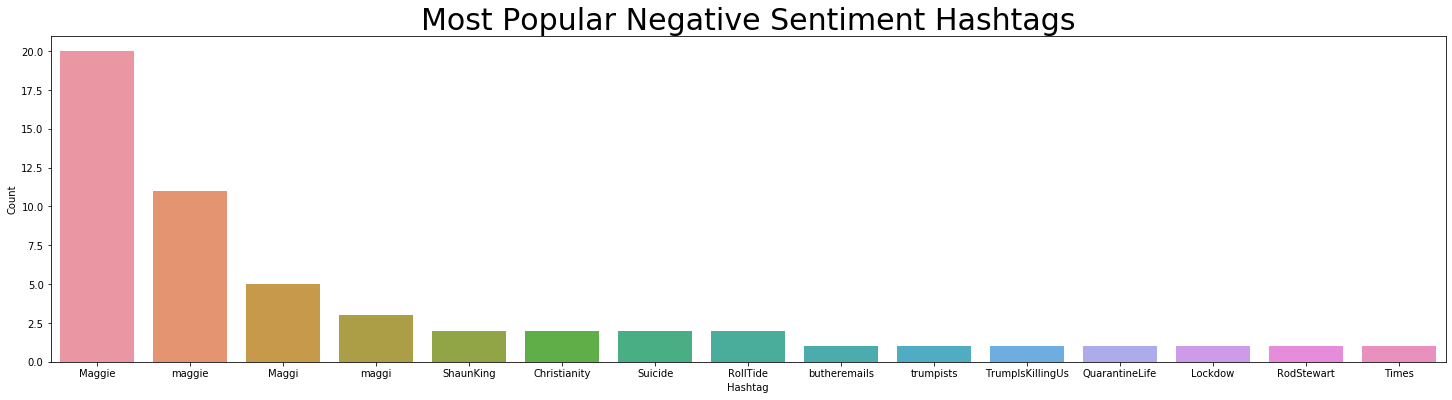

In [82]:
from nltk.probability import FreqDist
b =dict(nltk.FreqDist(HT_negative))
e =pd.DataFrame({'Hashtag':list(b.keys()),'Count':list(b.values())})
e=e.nlargest(columns="Count",n=15)
plt.figure(figsize=(25,6))
plt.title('Most Popular Negative Sentiment Hashtags', fontsize = 30)
ax=sns.barplot(data=e,x="Hashtag",y="Count")
ax.set(ylabel='Count')
plt.show()

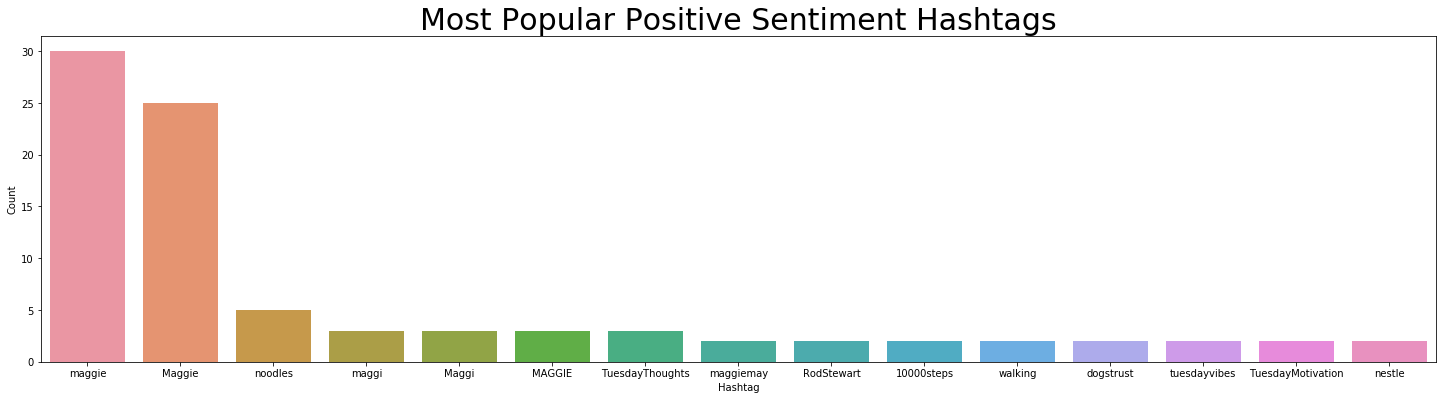

In [83]:

b =dict(nltk.FreqDist(HT_positive))
e =pd.DataFrame({'Hashtag':list(b.keys()),'Count':list(b.values())})
e=e.nlargest(columns="Count",n=15)
plt.figure(figsize=(25,6))
plt.title('Most Popular Positive Sentiment Hashtags', fontsize = 30)
ax=sns.barplot(data=e,x="Hashtag",y="Count")
ax.set(ylabel='Count')
plt.show()


['.ipynb_checkpoints',
 'final.ipynb',
 'hastag.csv',
 'hastagasd_sdf.csv',
 'hastagclinicplus.csv',
 'hastagclinicplus_clinic_shampoo.csv',
 'hastagclinic_clinicplus.csv',
 'hastagcovid19_traveling.csv',
 'hastagdettol.csv',
 'hastagfish.csv',
 'hastagnike_puma.csv',
 'hastagw_a_t_e_r_r_i_c_e.csv',
 'twitter_sentiment.ipynb']